Using BEL :

100
84
67
59
52
41
31
27
23
18
16
14
11
10
8
8
8
8
7
6
4
4
2
2
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


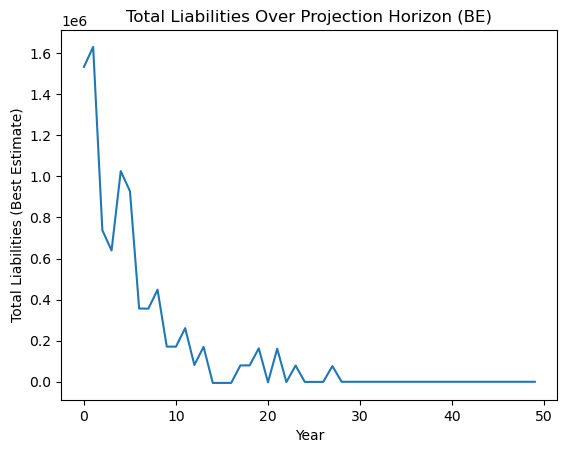

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_policy_values(N):
    """Initialize policy values for N policyholders"""
    return 100000 # np.full(N, 100000)  # Assuming an initial fund value of 100,000 euros for each policy

def mortality_survival_probs(life_table):
    """Compute survival probabilities from the provided life table"""
    p_survive = np.exp(-np.array(life_table))
    # p_survive = np.insert(p_survive, 0, 1.0)  # Inserting 1.0 at the beginning for birth
    return p_survive

def simulate_lapses(N, Ft, lapse_rate):
    """Simulate lapses for N policyholders"""
    nb_lapse = np.random.binomial(N, lapse_rate)
    loss_lapse = nb_lapse * (Ft - 20)  # Penalty of 20 euros per lapse
    New_nb_of_people_after_lapse = N - nb_lapse
    return loss_lapse, New_nb_of_people_after_lapse

def simulate_deaths(N, Ft, survival_probs, t):
    """Simulate deaths for N policyholders at time t"""
    policyholders_alive = np.random.binomial(N, survival_probs[t])
    nb_out = N - policyholders_alive
    cost_death = np.maximum(Ft, 100000) * nb_out  # Death benefit is maximum between Ft and premium payed at the beginning
    return policyholders_alive, cost_death

def simulate_expenses(t, policyholders_alive, Ft, loss_lapse, cost_death, discount_rate, rd_rate, comm_rate, last_expense):
    """Simulate expenses for policyholders"""
    # Discount factor for the current year
    discount_factor = 1 / ((1 + discount_rate) ** t)
    # Expense related to the regular deduction
    cash_flow_rd = policyholders_alive * (Ft - 20) * rd_rate * discount_factor
    # Expense related to commissions to the distribution channel
    expense_comm = comm_rate * policyholders_alive * Ft * discount_factor
    # Death costs discounted
    cost_death = cost_death * discount_factor
    # Lapse costs discounted 
    loss_lapse = loss_lapse * discount_factor
    # Total expenses (yearly cost + comm expenses + death costs + lapse costs)
    total_expense = last_expense * rd_rate * policyholders_alive * discount_factor + expense_comm + cost_death + loss_lapse
    # Total cash flow
    cash_flow = total_expense - cash_flow_rd
    # Discounted cash flow for the current year
    discounted_cash_flow = cash_flow # * discount_factor
    return discounted_cash_flow

# Parameters
N = 100  # Number of policyholders
T = 50  # Projection horizon
lapse_rate = 0.15  # Lapse rate
rd_rate = 0.022  # Expense rate
comm_rate = 0.014  # Commission rate
discount_rate = 0.01  # Risk-free discount rate (can be derived from the yield curve)
inflation_rate = 0.02  # Inflation rate

# Initialize policy values and expenses
Ft = initialize_policy_values(N)
last_expense = 50  # Initial unitary cost per policy

# Load mortality rates from the life table
# Here it's dummy data, replace with actual life table 
life_table = np.array([
    0.0102, 0.0107, 0.0112, 0.0117, 0.0122,  # Age 60-64
    0.0127, 0.0133, 0.0140, 0.0147, 0.0154,  # Age 65-69
    0.0162, 0.0170, 0.0180, 0.0190, 0.0202,  # Age 70-74
    0.0215, 0.0231, 0.0249, 0.0269, 0.0290,  # Age 75-79
    0.0314, 0.0342, 0.0373, 0.0407, 0.0446,  # Age 80-84
    0.0489, 0.0537, 0.0590, 0.0648, 0.0711,  # Age 85-89
    0.0781, 0.0857, 0.0938, 0.1028, 0.1126,  # Age 90-94
    0.1232, 0.1348, 0.1473, 0.1608, 0.1752,  # Age 95-99
    0.1906, 0.2068, 0.2239, 0.2419, 0.2607,  # Age 100-104
    0.2806, 0.3008, 0.3335, 0.3550, 0.3800   # Age 105-109
]) 

# Simulate liabilities over the projection horizon
total_costs = []
New_nb_of_people_after_lapse_and_after_deaths = N # INITIALISATION
for t in range(T):
    print(str(New_nb_of_people_after_lapse_and_after_deaths))
    N = New_nb_of_people_after_lapse_and_after_deaths # at each loop
    survival_probs = mortality_survival_probs(life_table)
    loss_lapse, New_nb_of_people_after_lapse = simulate_lapses(N, Ft, lapse_rate)
    New_nb_of_people_after_lapse_and_after_deaths, cost_death = simulate_deaths(New_nb_of_people_after_lapse, Ft, survival_probs, t)
    cash_flow = simulate_expenses(t, New_nb_of_people_after_lapse_and_after_deaths, Ft, loss_lapse, cost_death, discount_rate, rd_rate, comm_rate, last_expense)
    total_costs.append(np.sum(cash_flow))
    last_expense *= (1 + inflation_rate)  # Update expense for next year
    # print(Ft)

# Plot total costs over time
plt.plot(range(T), total_costs)
plt.xlabel('Year')
plt.ylabel('Total Liabilities (Best Estimate)')
plt.title('Total Liabilities Over Projection Horizon (BE)')
plt.show()


In [53]:
survival_probs = mortality_survival_probs(life_table)
survival_probs

array([0.98985184, 0.98935704, 0.98886249, 0.98836818, 0.98787412,
       0.9873803 , 0.98678805, 0.98609754, 0.98540752, 0.98471797,
       0.98393051, 0.98314368, 0.98216103, 0.98117936, 0.98000265,
       0.97872948, 0.97716476, 0.97540745, 0.97345858, 0.97141646,
       0.96908786, 0.96637821, 0.96338708, 0.96011712, 0.95637996,
       0.95227635, 0.94771638, 0.94270677, 0.9372549 , 0.93136875,
       0.92487193, 0.91786955, 0.91046484, 0.90230742, 0.89350799,
       0.88408683, 0.87389067, 0.86303503, 0.85146235, 0.83928915,
       0.82646311, 0.81318227, 0.79939507, 0.78513469, 0.77051204,
       0.75533041, 0.7402258 , 0.7164119 , 0.70117344, 0.68386141])

In [42]:
print(t)

49


In [54]:
np.exp(-0.0102)

0.9898518435820949